In [1]:
def predict(row, coef):
    yhat = coef[0]
    for i in range(len(row) - 1):
        yhat += coef[i + 1] * row[i]
    return yhat

In [15]:
import pandas as pd

data = pd.DataFrame({"x":[1,2,4,3,5], "y":[1,3,3,2,5]})
coef = [0.4, 0.8]

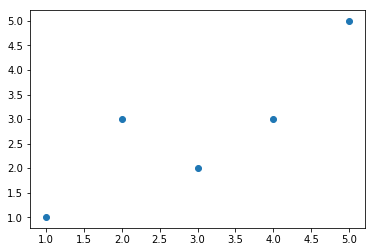

In [7]:
import matplotlib.pyplot as plt

plt.scatter(data["x"], data["y"])

In [16]:
for i in data.index:
    yhat = predict(data.iloc[i], coef)
    print("Expected = {}, Predicted = {}".format(data.iloc[i][-1], yhat))

Expected = 1, Predicted = 1.2000000000000002
Expected = 3, Predicted = 2.0
Expected = 3, Predicted = 3.6
Expected = 2, Predicted = 2.8000000000000003
Expected = 5, Predicted = 4.4


In [29]:
def coef_sgd(train, learn, epochs):
    coef = [0.0 for i in range(len(train.iloc[0]))]
    for epoch in range(epochs):
        sum_error = 0
        for index, row in train.iterrows():
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - learn * error
            for i in range(len(row) - 1):
                coef[i+1] = coef[i+1] - learn * error * row[i]
        print("epoch {}, error = {}".format(epoch, sum_error))
    return coef

In [53]:
wine = pd.read_csv("M:\\Spring\\experimentation\\week 4\\winequality-white.csv")

for col in wine.columns:
    wine[col] = (wine[col] - wine[col].min()) / (wine[col].max() - wine[col].min())

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


In [54]:
coef_sgd(wine, 0.05, 20)

epoch 0, error = 81.50583198333192
epoch 1, error = 75.95027986889014
epoch 2, error = 75.55165091668961
epoch 3, error = 75.44606453229078
epoch 4, error = 75.38619948708582
epoch 5, error = 75.33471091958802
epoch 6, error = 75.28598143797251
epoch 7, error = 75.2393046133108
epoch 8, error = 75.19459772816651
epoch 9, error = 75.15179746116597
epoch 10, error = 75.11081673339721
epoch 11, error = 75.07156142559003
epoch 12, error = 75.03394125057726
epoch 13, error = 74.99787332083525
epoch 14, error = 74.96328232042414
epoch 15, error = 74.93009955882702
epoch 16, error = 74.89826185344356
epoch 17, error = 74.86771055554071
epoch 18, error = 74.83839078401564
epoch 19, error = 74.81025084681548


[0.44793481853425082,
 -0.0864031005886398,
 -0.31515552115106049,
 -0.018172869589010581,
 0.56709714924432819,
 -0.013555520971440487,
 0.20876140707003901,
 -0.064944996856390297,
 -0.46618130849535844,
 -0.022163042602389431,
 0.045923906192909633,
 0.29318297327580373]